In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
import math

In [2]:
#PRENATAL
gal = pd.read_csv('/Users/georgesba/Desktop/charts/gal.csv')
galefw = pd.read_csv('/Users/georgesba/Desktop/charts/galefw.csv')
genrpre = pd.read_csv('/Users/georgesba/Desktop/charts/genr_pre.csv')
keen = pd.read_csv('/Users/georgesba/Desktop/charts/keen.csv')
sch = pd.read_csv('/Users/georgesba/Desktop/charts/sch.csv')
schefw = pd.read_csv('/Users/georgesba/Desktop/charts/sch_w.csv')
sch_ac = pd.read_csv('/Users/georgesba/Desktop/charts/sch_ac.csv')
yeo = pd.read_csv('/Users/georgesba/Desktop/charts/yeo.csv')

In [3]:
#POSTNATAL
ChinaBoys = pd.read_csv("/Users/georgesba/Desktop/charts/china_boys.csv")
ChinaGirls = pd.read_csv("/Users/georgesba/Desktop/charts/china_girls.csv")
WhoBoys = pd.read_excel("/Users/georgesba/Desktop/charts/hcfa-boys-0-5-zscores.xlsx")
WhoGirls = pd.read_excel("/Users/georgesba/Desktop/charts/hcfa-girls-0-5-zscores.xlsx")
CDCBoys = pd.read_excel("/Users/georgesba/Desktop/charts/CDCMale0-36mo.xlsx")
CDCGirls = pd.read_excel("/Users/georgesba/Desktop/charts/CDCFemale0-36mo.xlsx")
genrpost = pd.read_csv('/Users/georgesba/Desktop/charts/genr_post.csv')

In [4]:
months_range = pd.DataFrame({'Months': range(16, 68)})
genrpost = pd.concat([genrpost, months_range]).sort_values(by='Months').reset_index(drop=True)

# PRENATAL

In [5]:
def mean_hc_male(X):
    return np.exp(2.21*X**(-1) - 7.2*X**(-0.5) + 0.0001*X**2 + 3.8)

def mean_hc_fem(X):
    return np.exp(121.3*X**(-2) - 26.0*(X**-1) - 0.0001*(X**2) + 3.2)

def sd_hc_male(X):
    return -80.5 * X**(-1) + 11.6

def sd_hc_fem(X):
    return -91.5 * X**(-1) + 11.8

# Mean and SD Regression Equations (AC)
def mean_ac_male(X):
    return np.exp(-18.2 * X**(-2) - 5.1 * X**(-0.5) + 3.3)

def mean_ac_fem(X):
    return np.exp(-3.4 * X**(-0.5) + 0.02 * X - 0.0002 * X**(2) + 2.6)

def sd_ac_male(X):
    return 5.0 * X**(0.5) - 14.8

def sd_ac_fem(X):
    return 4.8 * X**(0.5) - 13.5

# Mean and SD Regression Equations (FL)
def mean_fl_male(X):
    return np.exp(-43.2 * X**(-2) - 11.5 * X**(-1) + 2.2)

def mean_fl_fem(X):
    return np.exp(-15.7 * X**(-1) - 0.00002 * X**(2) + 2.3)

def sd_fl_male(X):
    return -8.1 * X**(-0.5) + 3.7

def sd_fl_fem(X):
    return -232.7 * X**(-2) + 2.5

In [6]:
gal_diff = gal['C50(mm)'] - gal['C50(mm).1']

In [7]:
keen_diff = pd.Series(index=range(len(keen)))

for i in range(len(keen)):
    boys_mm = keen.loc[i, "head_circ_boys_cm"] * 10
    girls_mm = keen.loc[i, "head_circ_girls_cm"] * 10
    keen_diff[i] = np.mean(boys_mm - girls_mm)

/var/folders/q7/vvqg0qhd3454dts270mcm1900000gs/T/ipykernel_46953/228700185.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  keen_diff = pd.Series(index=range(len(keen)))


In [8]:
sch_diff = pd.Series(index=range(len(sch)))

for i in range(len(sch)):
    sch_diff[i] = np.mean(sch.loc[i, "M_Mean (mm)"] - sch.loc[i, "F_Mean (mm)"])

/var/folders/q7/vvqg0qhd3454dts270mcm1900000gs/T/ipykernel_46953/2230894288.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sch_diff = pd.Series(index=range(len(sch)))


In [9]:
yeo_diff = pd.Series(index=range(len(yeo)))

for i in range(len(yeo)):
    yeo_diff[i] = np.mean(yeo.loc[i, "50th Centile_Male(mm)"] - yeo.loc[i, "50th Centile_Female(mm)"])

/var/folders/q7/vvqg0qhd3454dts270mcm1900000gs/T/ipykernel_46953/1216449483.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  yeo_diff = pd.Series(index=range(len(yeo)))


In [10]:
mel_x = np.arange(15, 41, dtype=float)

mel_output_male = mean_hc_male(mel_x)
mel_output_fem = mean_hc_fem(mel_x)

mel_diff = mel_output_male - mel_output_fem

In [11]:
keen_diffl = pd.Series(index=range(len(keen)))

for i in range(len(keen)):
    keen_diffl[i] = np.mean(keen.loc[i, "length_boys_cm"] - keen.loc[i, "length_girls_cm"])

/var/folders/q7/vvqg0qhd3454dts270mcm1900000gs/T/ipykernel_46953/783564345.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  keen_diffl = pd.Series(index=range(len(keen)))


In [12]:
yeo_3m = yeo['3rd Centile_Male(mm)']
yeo_97m = yeo['97th Centile_Male(mm)']

yeo_sdvalsm = (yeo_97m - yeo_3m) / (2 * norm.ppf(0.975))

In [13]:
yeo_3f = yeo['3rd Centile_Fenale(mm)']
yeo_97f = yeo['97th Centile_Female(mm)']

yeo_sdvalsf = (yeo_97f - yeo_3f) / (2 * norm.ppf(0.975))

In [14]:
gal_10m = gal['C10(mm)']
gal_90m = gal['C90(mm)']

gal_sdvalsm = (gal_90m - gal_10m) / (2 * norm.ppf(0.975))

In [15]:
gal_10f = gal['C10(mm).1']
gal_90f = gal['C90(mm).1']

gal_sdvalsf = (gal_90f - gal_10f) / (2 * norm.ppf(0.975))

In [16]:
keenFSD = keen['head_circsd_girls_cm'] * 10
keenMSD = keen['head_circsd_boys_cm'] * 10

In [17]:
yeo_pSD = np.sqrt((yeo_sdvalsm**2 + yeo_sdvalsf**2) / 2)
gal_pSD = np.sqrt((gal_sdvalsf**2 + gal_sdvalsm**2) / 2)
sch_pSD = np.sqrt((sch['F_SD (mm)']**2 + sch['M_SD (mm)']**2) / 2)
keen_pSD = np.sqrt((keenFSD**2 + keenMSD**2) / 2)
mel_pSD = np.sqrt((sd_hc_fem(mel_x)**2 + sd_hc_male(mel_x)**2) / 2)

In [18]:
yeoES = yeo_diff / yeo_pSD
galES = gal_diff / gal_pSD
schES = sch_diff / sch_pSD
keenES = keen_diff / keen_pSD
melES = mel_diff / mel_pSD

In [19]:
yeoESvWeek = pd.DataFrame({'x': yeo['Gestational Age'], 'y': yeoES})
galESvWeek = pd.DataFrame({'x': gal['GA(mm)'], 'y': galES})
schESvWeek = pd.DataFrame({'x': sch['F_GA (Weeks)'], 'y': schES})
keenESvWeek = pd.DataFrame({'x': keen['gestationweeks'], 'y': keenES})
melESvWeek = pd.DataFrame({'x': mel_x, 'y': melES})
genrESvWeek = pd.DataFrame({'x': genrpre['Weeks'], 'y': genrpre['Effect_Size']})

yeoESvWeek['x'] = yeoESvWeek['x']
galESvWeek['x'] = galESvWeek['x']
schESvWeek['x'] = schESvWeek['x']
keenESvWeek['x'] = keenESvWeek['x']
melESvWeek['x'] = melESvWeek['x']
genrESvWeek['x'] = genrESvWeek['x']

# POSTNATAL

In [20]:
WhoAgeMonths = WhoBoys['Month']
CDCAgeMonths = CDCBoys['Age (in months)']
ChinaAgeMonths = ChinaBoys['Month']
genrpMonths = genrpost['Months']

In [21]:
WhoBoysMean = WhoBoys['M']
WhoGirlsMean = WhoGirls['M']
CDCBoysMean = CDCBoys['50th Percentile Head Circumference (in centimeters)']
CDCGirlsMean = CDCGirls['50th Percentile Head Circumference (in centimeters)']
ChinaBoysMedian = ChinaBoys['Median']
ChinaGirlsMedian = ChinaGirls['Median']

In [22]:
WhoDifference = WhoBoysMean - WhoGirlsMean
CDCDifference = CDCBoysMean - CDCGirlsMean
ChinaDifference = ChinaBoysMedian - ChinaGirlsMedian

In [23]:
WhoBoysSD = WhoBoys['SD']
WhoGirlsSD = WhoGirls['SD']
ChinaBoysSD = ChinaBoys['SD']
ChinaGirlsSD = ChinaGirls['SD']

In [24]:
CDCBoysQ1 = CDCBoys['25th Percentile Head Circumference (in centimeters)']
CDCBoysQ3 = CDCBoys['75th Percentile Head Circumference (in centimeters)']
CDCBoysIQR = CDCBoysQ3 - CDCBoysQ1
CDCBoysSD = CDCBoysIQR / 1.35

CDCGirlsQ1 = CDCGirls['25th Percentile Head Circumference (in centimeters)']
CDCGirlsQ3 = CDCGirls['75th Percentile Head Circumference (in centimeters)']
CDCGirlsIQR = CDCGirlsQ3 - CDCGirlsQ1
CDCGirlsSD = CDCGirlsIQR / 1.35

In [25]:
WhoPooledSD = np.sqrt((WhoBoysSD**2 + WhoGirlsSD**2) / 2)
CDCPooledSD = np.sqrt((CDCBoysSD**2 + CDCGirlsSD**2) / 2)
ChinaPooledSD = np.sqrt((ChinaBoysSD**2 + ChinaGirlsSD**2) / 2)

In [26]:
WhoES = WhoDifference/WhoPooledSD
CDCES = CDCDifference/CDCPooledSD
ChinaES = ChinaDifference/ChinaPooledSD

In [27]:
WhoESvAge = pd.DataFrame({'x': WhoAgeMonths, 'y': WhoES})
CDCESvAge = pd.DataFrame({'x': CDCAgeMonths, 'y': CDCES})
ChinaESvAge = pd.DataFrame({'x': ChinaAgeMonths, 'y': ChinaES})
genrpESvAge = pd.DataFrame({'x': genrpost['Months'] , 'y': genrpost['Effect_Size']})

# SOPHIA

In [28]:
sophiaorg = pd.read_excel('/Users/georgesba/Desktop/data/sophia.xlsx')
sophia2 = sophiaorg.drop(np.r_[24950:24970, 25477:25489]) #omit male-only data
sophia1 = sophia2.dropna(subset=['ICV'])
sophia = sophia1.sort_values(by='age')

In [29]:
window_size, step_size = 5, 1

def calculate_avg_surface_area(df):
    return (df['LSurfArea'] + df['RSurfArea']) / 2

def calculate_avg_thickness(df):
    return (df['LThickness'] + df['RThickness']) / 2

def calculate_volume(df):
    return df['AvgSurfArea'] * df['AvgThickness']

def cohen_d(male_data, female_data):
    pooled_std = np.sqrt((male_data.std() ** 2 + female_data.std() ** 2) / 2)
    return (male_data.mean() - female_data.mean()) / pooled_std

min_age = round(sophia['age'].min())
max_age = round(sophia['age'].max())

cohens_d_volume = []
window_age = []

for age_group in range(min_age, max_age - window_size + 1, step_size):
    
    age_group_months = age_group * 12
    
    window = sophia[(sophia['age'] >= age_group) & (sophia['age'] < age_group + window_size)].copy()

    window.loc[:, 'AvgSurfArea'] = calculate_avg_surface_area(window)
    window.loc[:, 'AvgThickness'] = calculate_avg_thickness(window)
    window.loc[:, 'AvgVolume'] = calculate_volume(window)
    
    male_data = window[window['sex'] == 1]
    female_data = window[window['sex'] == 2]

    if len(male_data) > 0 and len(female_data) > 0:
        window_age.append(age_group_months) 
        cohens_d_volume.append(cohen_d(male_data['AvgVolume'], female_data['AvgVolume']))

In [30]:
yeoESvWeek['x'] = yeoESvWeek['x']
galESvWeek['x'] = galESvWeek['x']
schESvWeek['x'] = schESvWeek['x']
keenESvWeek['x'] = keenESvWeek['x']
melESvWeek['x'] = melESvWeek['x']
genrESvWeek['x'] = genrESvWeek['x']
#postnatal (+ ~9mo)
WhoESvAge['x'] = WhoESvAge['x']
CDCESvAge['x'] = CDCESvAge['x']
ChinaESvAge['x'] = ChinaESvAge['x']
genrpESvAge['x'] = genrpESvAge['x']
#add lifespan
window_age = window_age

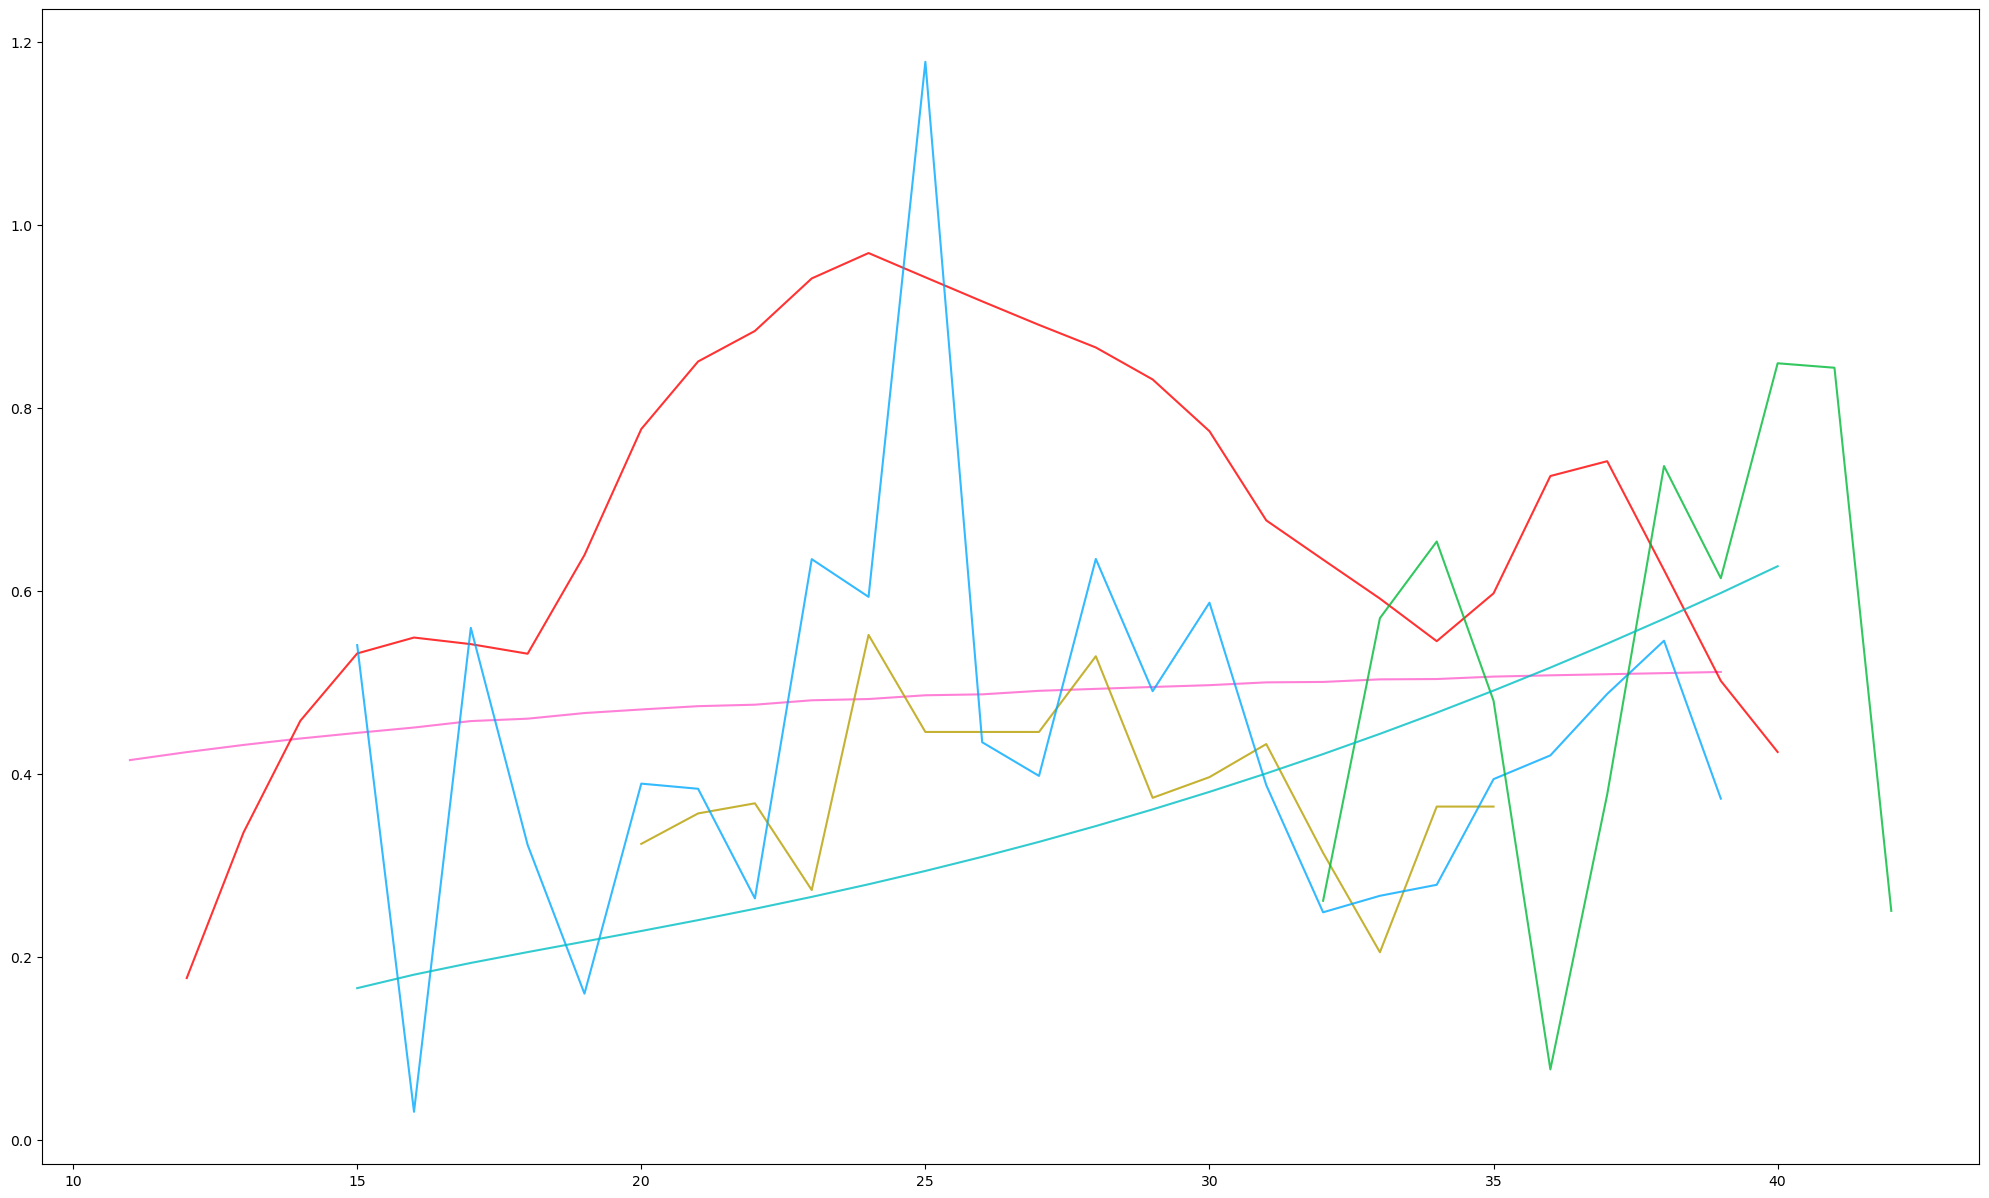

In [31]:
plt.figure(figsize=(25, 15))
plt.plot(yeoESvWeek['x'], yeoESvWeek['y'], alpha=0.8, label='yeo', color='#FF61CC')
plt.plot(galESvWeek['x'], galESvWeek['y'], alpha=0.8, label='gal', color='red')
plt.plot(genrESvWeek['x'], genrESvWeek['y'], alpha=0.8, label='genr_prenatal', color='#B79F00')
plt.plot(schESvWeek['x'], schESvWeek['y'], alpha=0.8, label='sch', color='#00A9FF')
plt.plot(keenESvWeek['x'], keenESvWeek['y'], alpha=0.8, label='keen', color='#00BA38')
plt.plot(melESvWeek['x'], melESvWeek['y'], alpha=0.8, label='mel', color='#00BFC4')

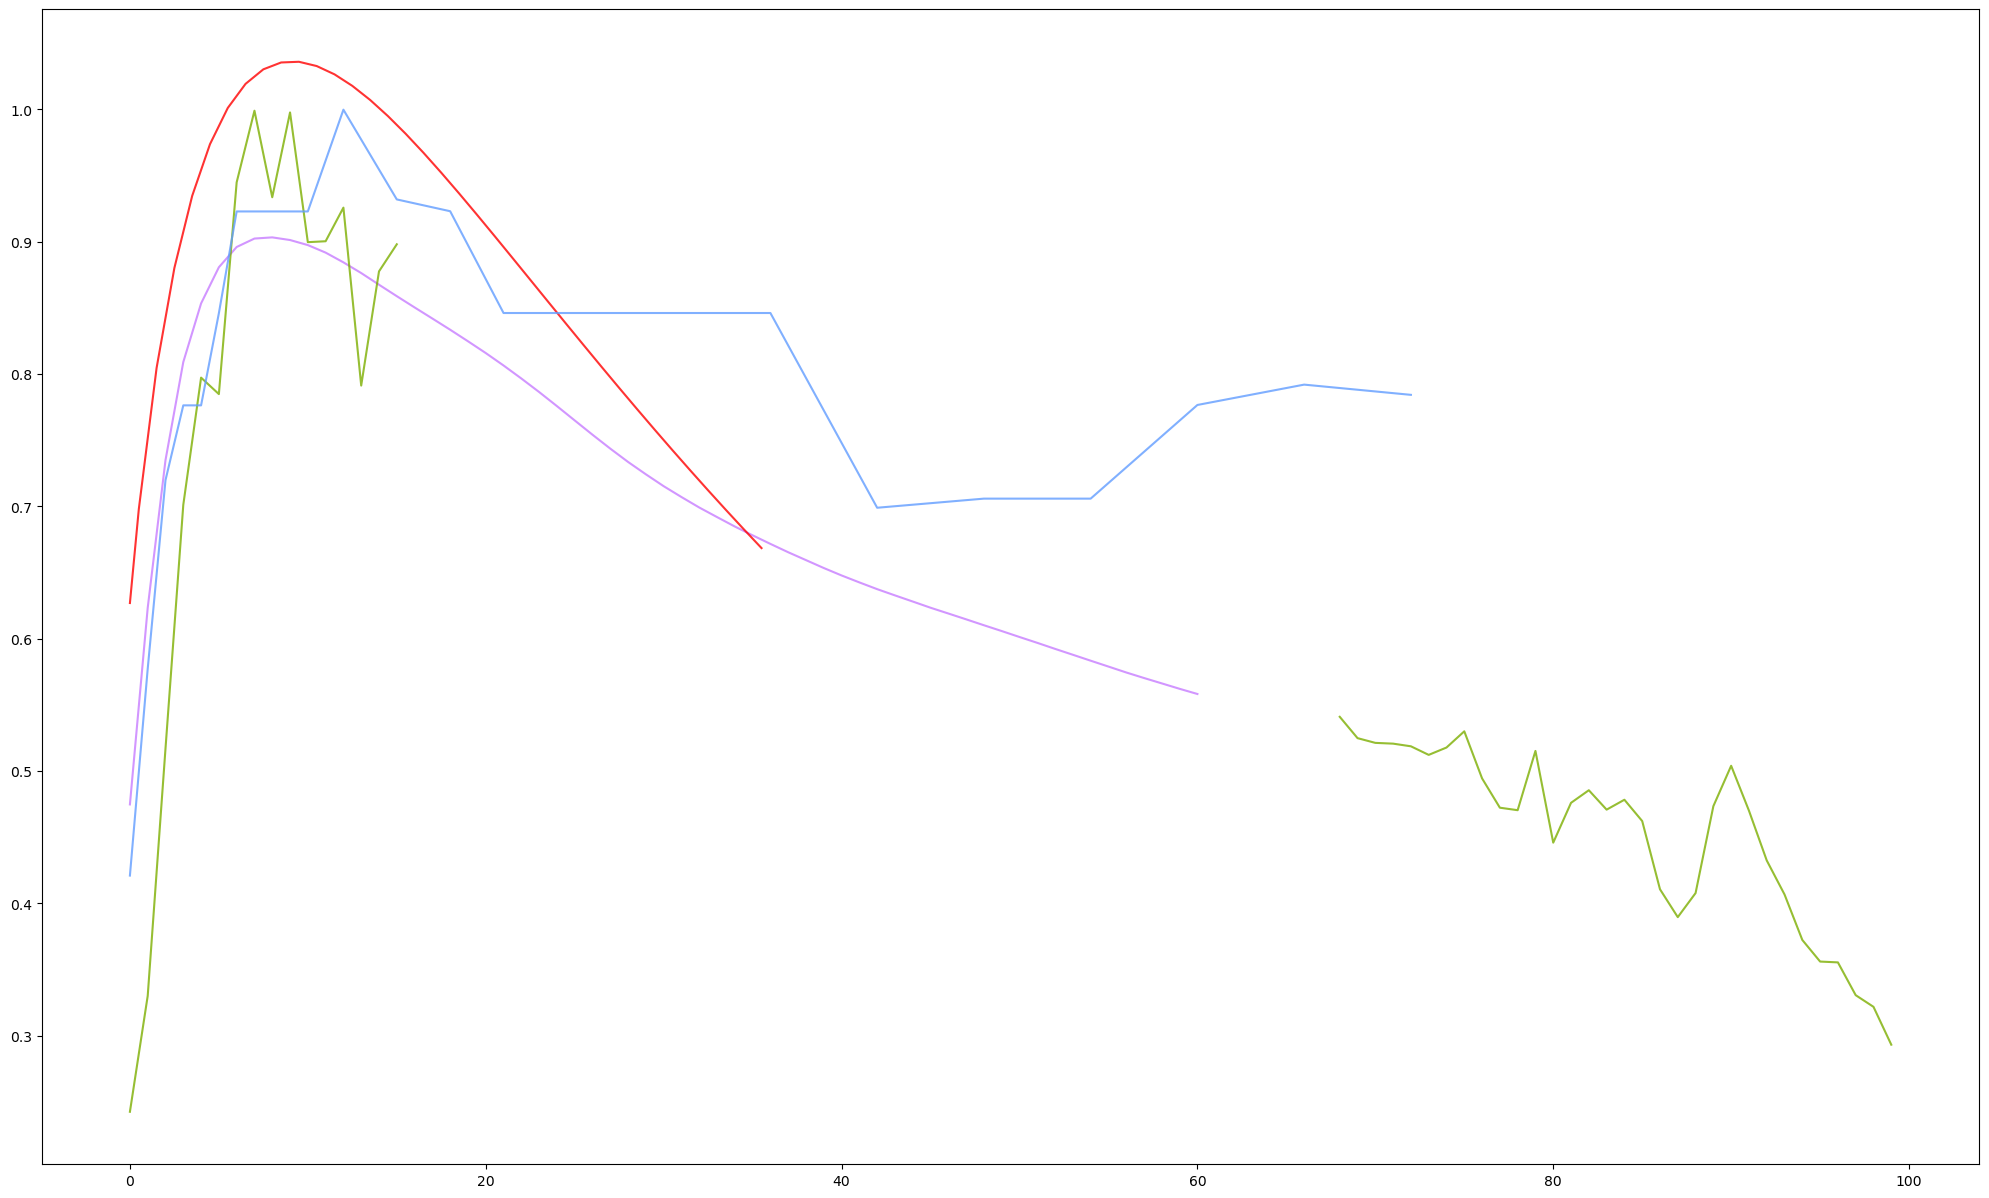

In [32]:
plt.figure(figsize=(25, 15))
plt.plot(WhoESvAge['x'], WhoESvAge['y'], alpha=0.8, label='Who', color='#C77CFF')
plt.plot(CDCESvAge['x'], CDCESvAge['y'], alpha=0.8, label='CDC', color='red')
plt.plot(genrpESvAge['x'].dropna(), genrpESvAge['y'], alpha=0.8, label='genr_postnatal', color='#7CAE00')
plt.plot(ChinaESvAge['x'], ChinaESvAge['y'], alpha=0.8, label='China', color='#619CFF')

In [33]:
# convert weeks to years, months to years
#prenatal
yeoESvWeek['x'] = np.log10(yeoESvWeek['x'] * 0.230137)
galESvWeek['x'] = np.log10(galESvWeek['x'] * 0.230137)
schESvWeek['x'] = np.log10(schESvWeek['x'] * 0.230137)
keenESvWeek['x'] = np.log10(keenESvWeek['x'] * 0.230137)
melESvWeek['x'] = np.log10(melESvWeek['x'] * 0.230137)
genrESvWeek['x'] = np.log10(genrESvWeek['x'] * 0.230137)
#postnatal (+ ~9mo)
WhoESvAge['x'] = np.log10((WhoESvAge['x']) + 9)
CDCESvAge['x'] = np.log10((CDCESvAge['x']) + 9)
ChinaESvAge['x'] = np.log10((ChinaESvAge['x']) + 9)
genrpESvAge['x'] = np.log10((genrpESvAge['x']) + 9)
#add lifespan
window_age = np.array(window_age) 
window_age = np.log10(window_age)

### everything graph

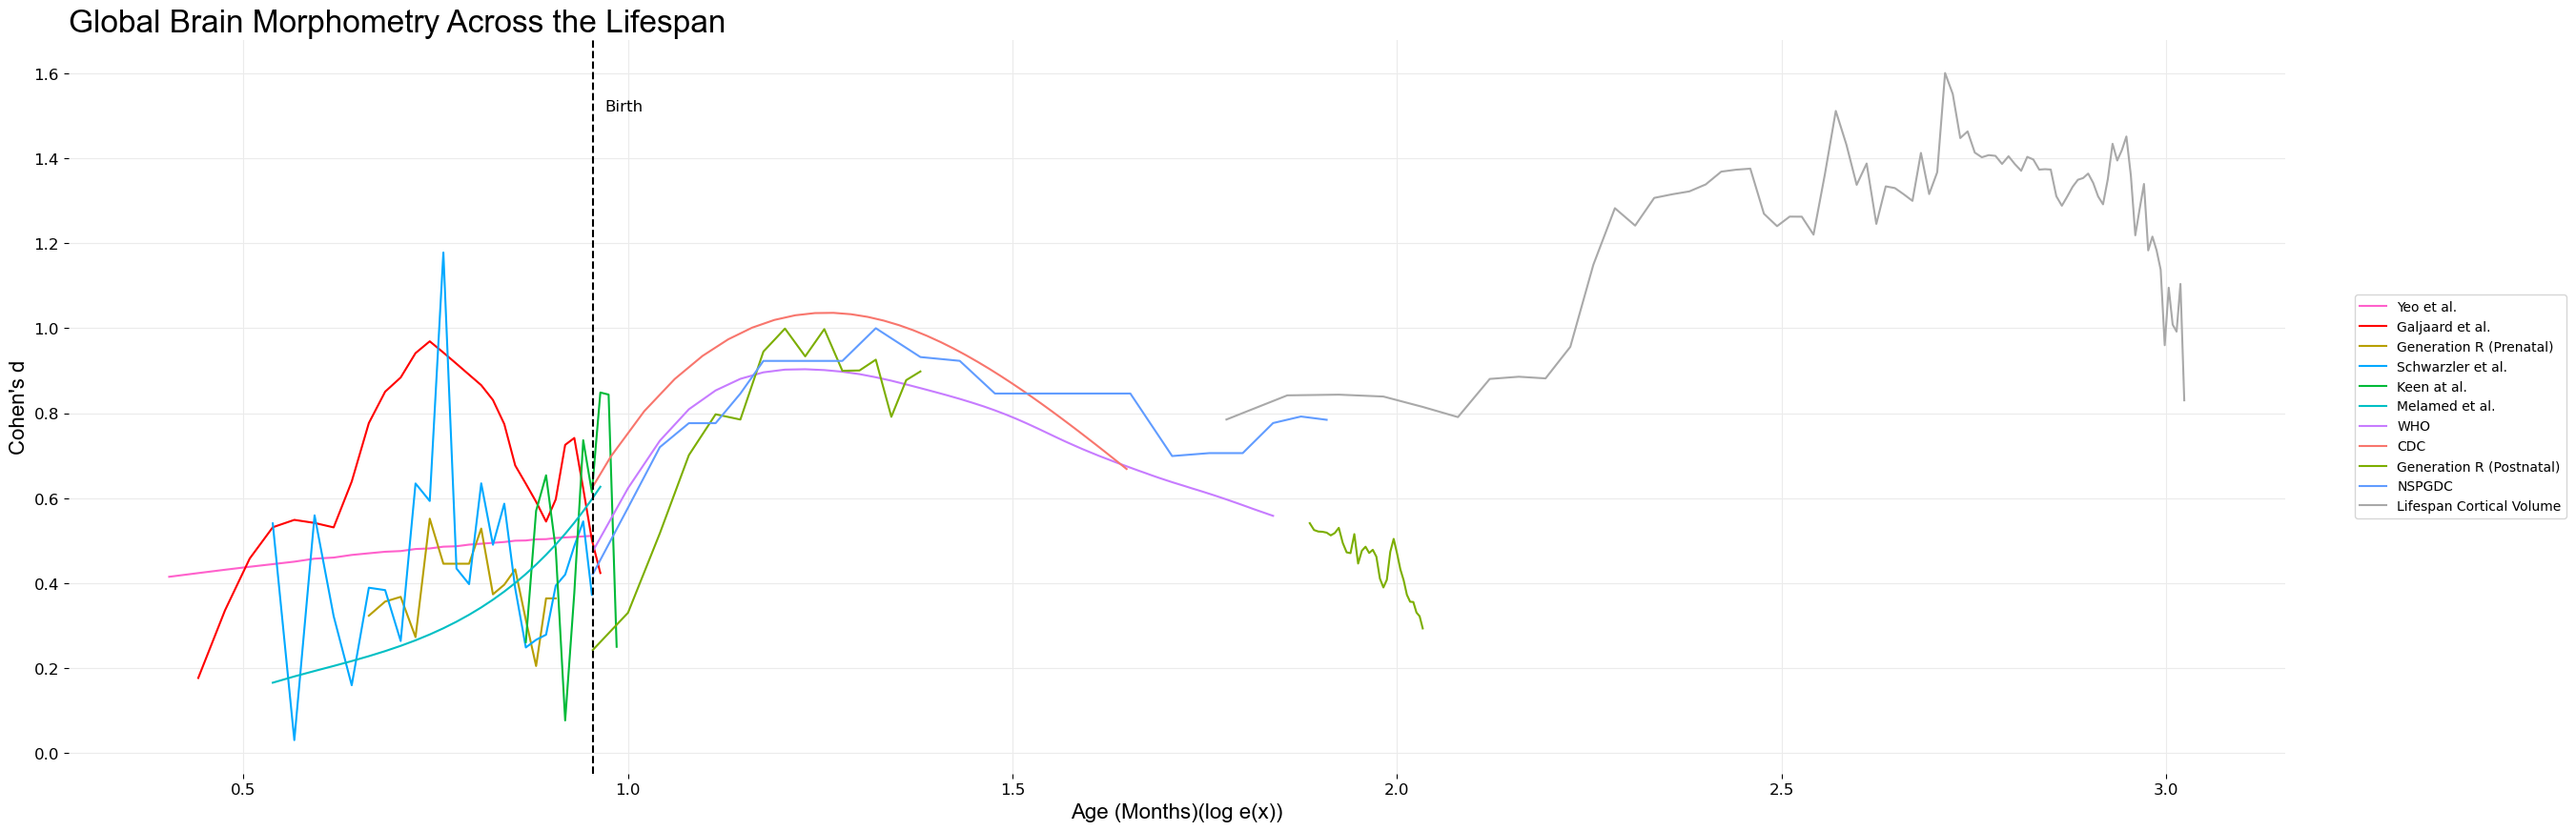

In [64]:
plt.figure(figsize=(30, 10))
plt.plot(yeoESvWeek['x'], yeoESvWeek['y'], label='Yeo et al.', color='#FF61CC')
plt.plot(galESvWeek['x'], galESvWeek['y'], label='Galjaard et al.', color='red')
plt.plot(genrESvWeek['x'], genrESvWeek['y'], label='Generation R (Prenatal)', color='#B79F00')
plt.plot(schESvWeek['x'], schESvWeek['y'], label='Schwarzler et al.', color='#00A9FF')
plt.plot(keenESvWeek['x'], keenESvWeek['y'], label='Keen at al.', color='#00BA38')
plt.plot(melESvWeek['x'], melESvWeek['y'], label='Melamed et al.', color='#00BFC4')
plt.plot(WhoESvAge['x'], WhoESvAge['y'], label='WHO', color='#C77CFF')
plt.plot(CDCESvAge['x'], CDCESvAge['y'], label='CDC', color='#F8766D')
plt.plot(genrpESvAge['x'], genrpESvAge['y'], label='Generation R (Postnatal)', color='#7CAE00')
plt.plot(ChinaESvAge['x'], ChinaESvAge['y'], label='NSPGDC', color='#619CFF')
plt.plot(window_age, cohens_d_volume, label="Lifespan Cortical Volume", color='darkgrey')
plt.xlabel('Age (Months)(log e(x))', fontname='Arial', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Cohen's d", fontname='Arial', fontsize=16)
plt.title('Global Brain Morphometry Across the Lifespan', fontname='Arial', fontsize=24, loc = 'left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, color=(235/255, 235/255, 235/255))
plt.legend(loc = 'right', bbox_to_anchor=(1.13, 0.5))
plt.axvline(x=.95424, color='black', linestyle='--', label='Birth')
plt.text(.95424 + .015, plt.ylim()[1] * .9, 'Birth', color='black', fontsize=12)
plt.show()